In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
import numpy as np

plt.rcParams["text.usetex"] = True
mpl.rcParams["figure.dpi"] = 800
plt.style.use("science")

/var/folders/6y/qbgd9jq10rn555nnfl8j7v840000gn/T/ipykernel_46463/2484274517.py:26: RuntimeWarning: invalid value encountered in divide
  u /= norm
/var/folders/6y/qbgd9jq10rn555nnfl8j7v840000gn/T/ipykernel_46463/2484274517.py:27: RuntimeWarning: invalid value encountered in divide
  v /= norm


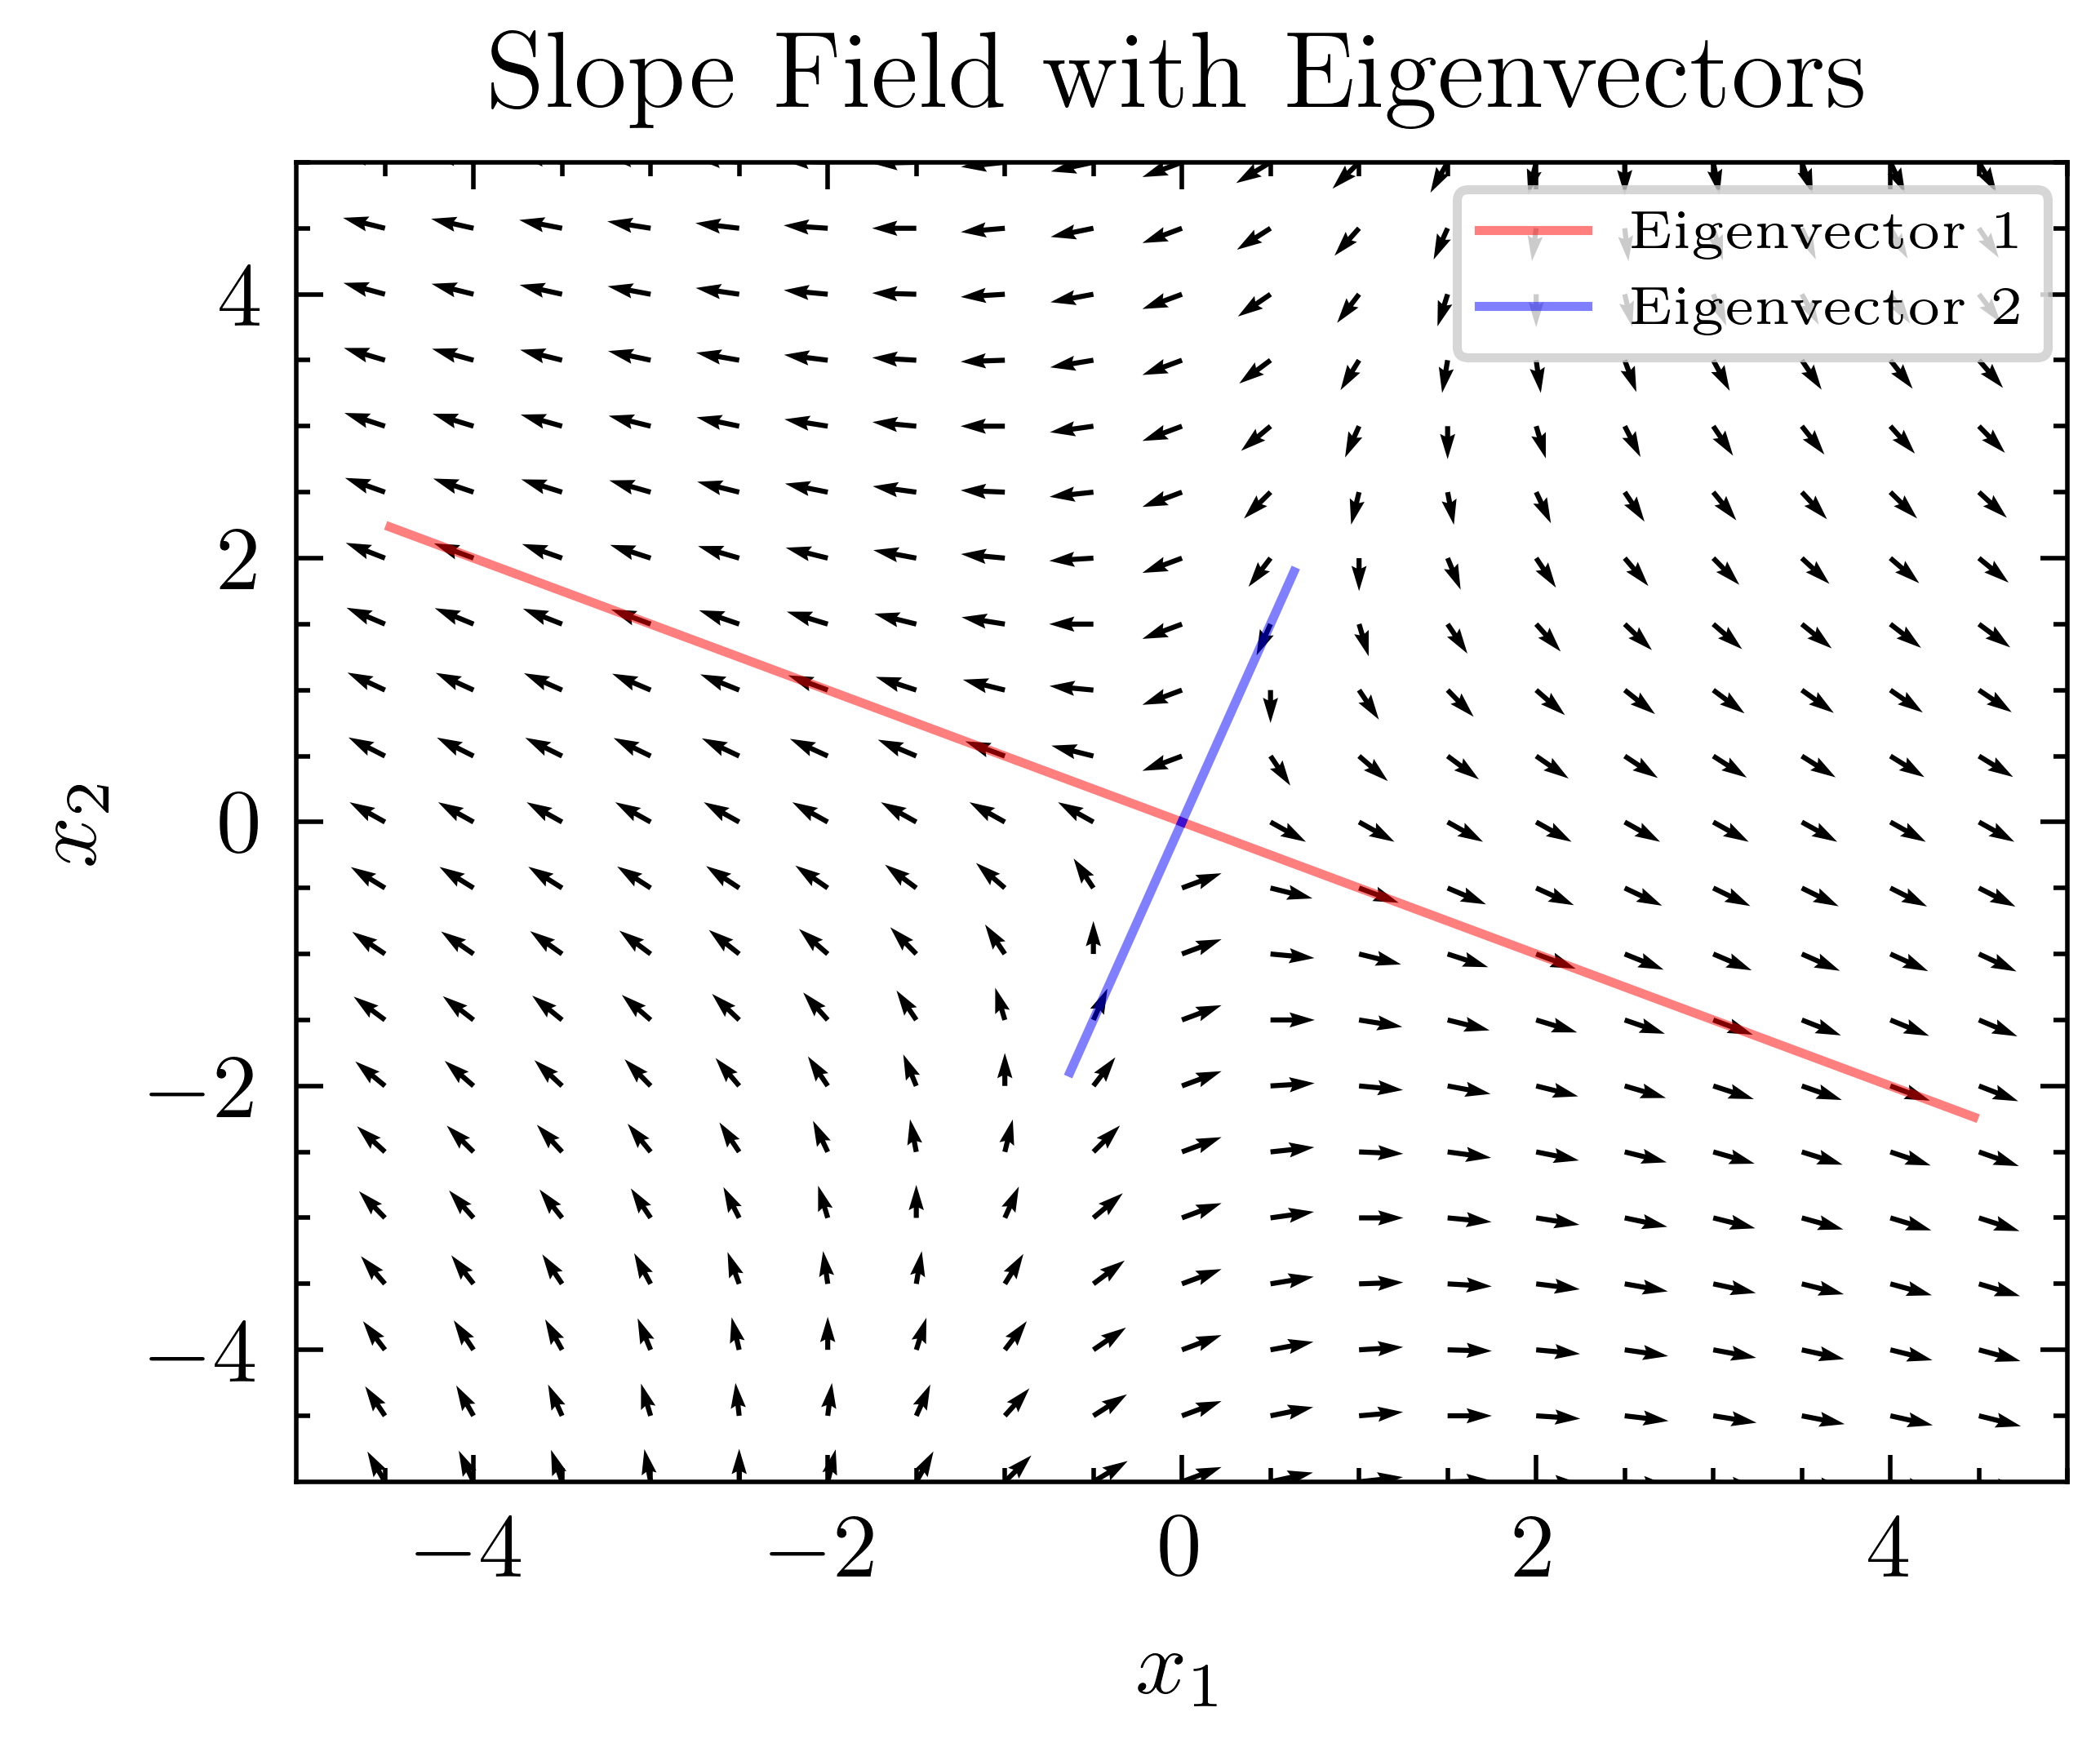

In [49]:
# define the coefficient matrix A
A = np.array([[4, -2],
              [-3, -1]])

# calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# define the range and step size for x and y
x_min, x_max = -5, 5
y_min, y_max = -5, 5
step = 0.5

# create a grid of points
x, y = np.meshgrid(np.arange(x_min, x_max + step, step),
                   np.arange(y_min, y_max + step, step))

# calculate the derivatives at each point
u = A[0, 0] * x + A[0, 1] * y
v = A[1, 0] * x + A[1, 1] * y

# normalize the derivatives for better visualization
norm = np.sqrt(u**2 + v**2)
u /= norm
v /= norm

# plot the slope field
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=4)

# define colors for the eigenvectors
colors = ['r', 'b']

# plot the eigenvectors as lines and label them
for i in range(len(eigenvalues)):
    eigenvector = eigenvectors[:, i]
    eigenvalue = eigenvalues[i]
    
    # scale the eigenvector by its eigenvalue
    scaled_eigenvector = eigenvalue * eigenvector
    
    # plot the eigenvector as a line
    plt.plot([0, scaled_eigenvector[0]], [0, scaled_eigenvector[1]],
             color=colors[i], linewidth=1, alpha=0.5, zorder=10,
             label=f'Eigenvector {i+1}')
    plt.plot([0, -scaled_eigenvector[0]], [0, -scaled_eigenvector[1]],
             color=colors[i], linewidth=1, alpha=0.5, zorder=10)

# set the limits and labels for the axes
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Slope Field with Eigenvectors')

# add a legend with an opaque background
plt.legend(fontsize=6, bbox_to_anchor=(0.64, 1), loc='upper left', frameon=True)

# display the plot
plt.grid(False)

plt.savefig('slope-field.png', dpi=800, bbox_inches='tight')
plt.show()

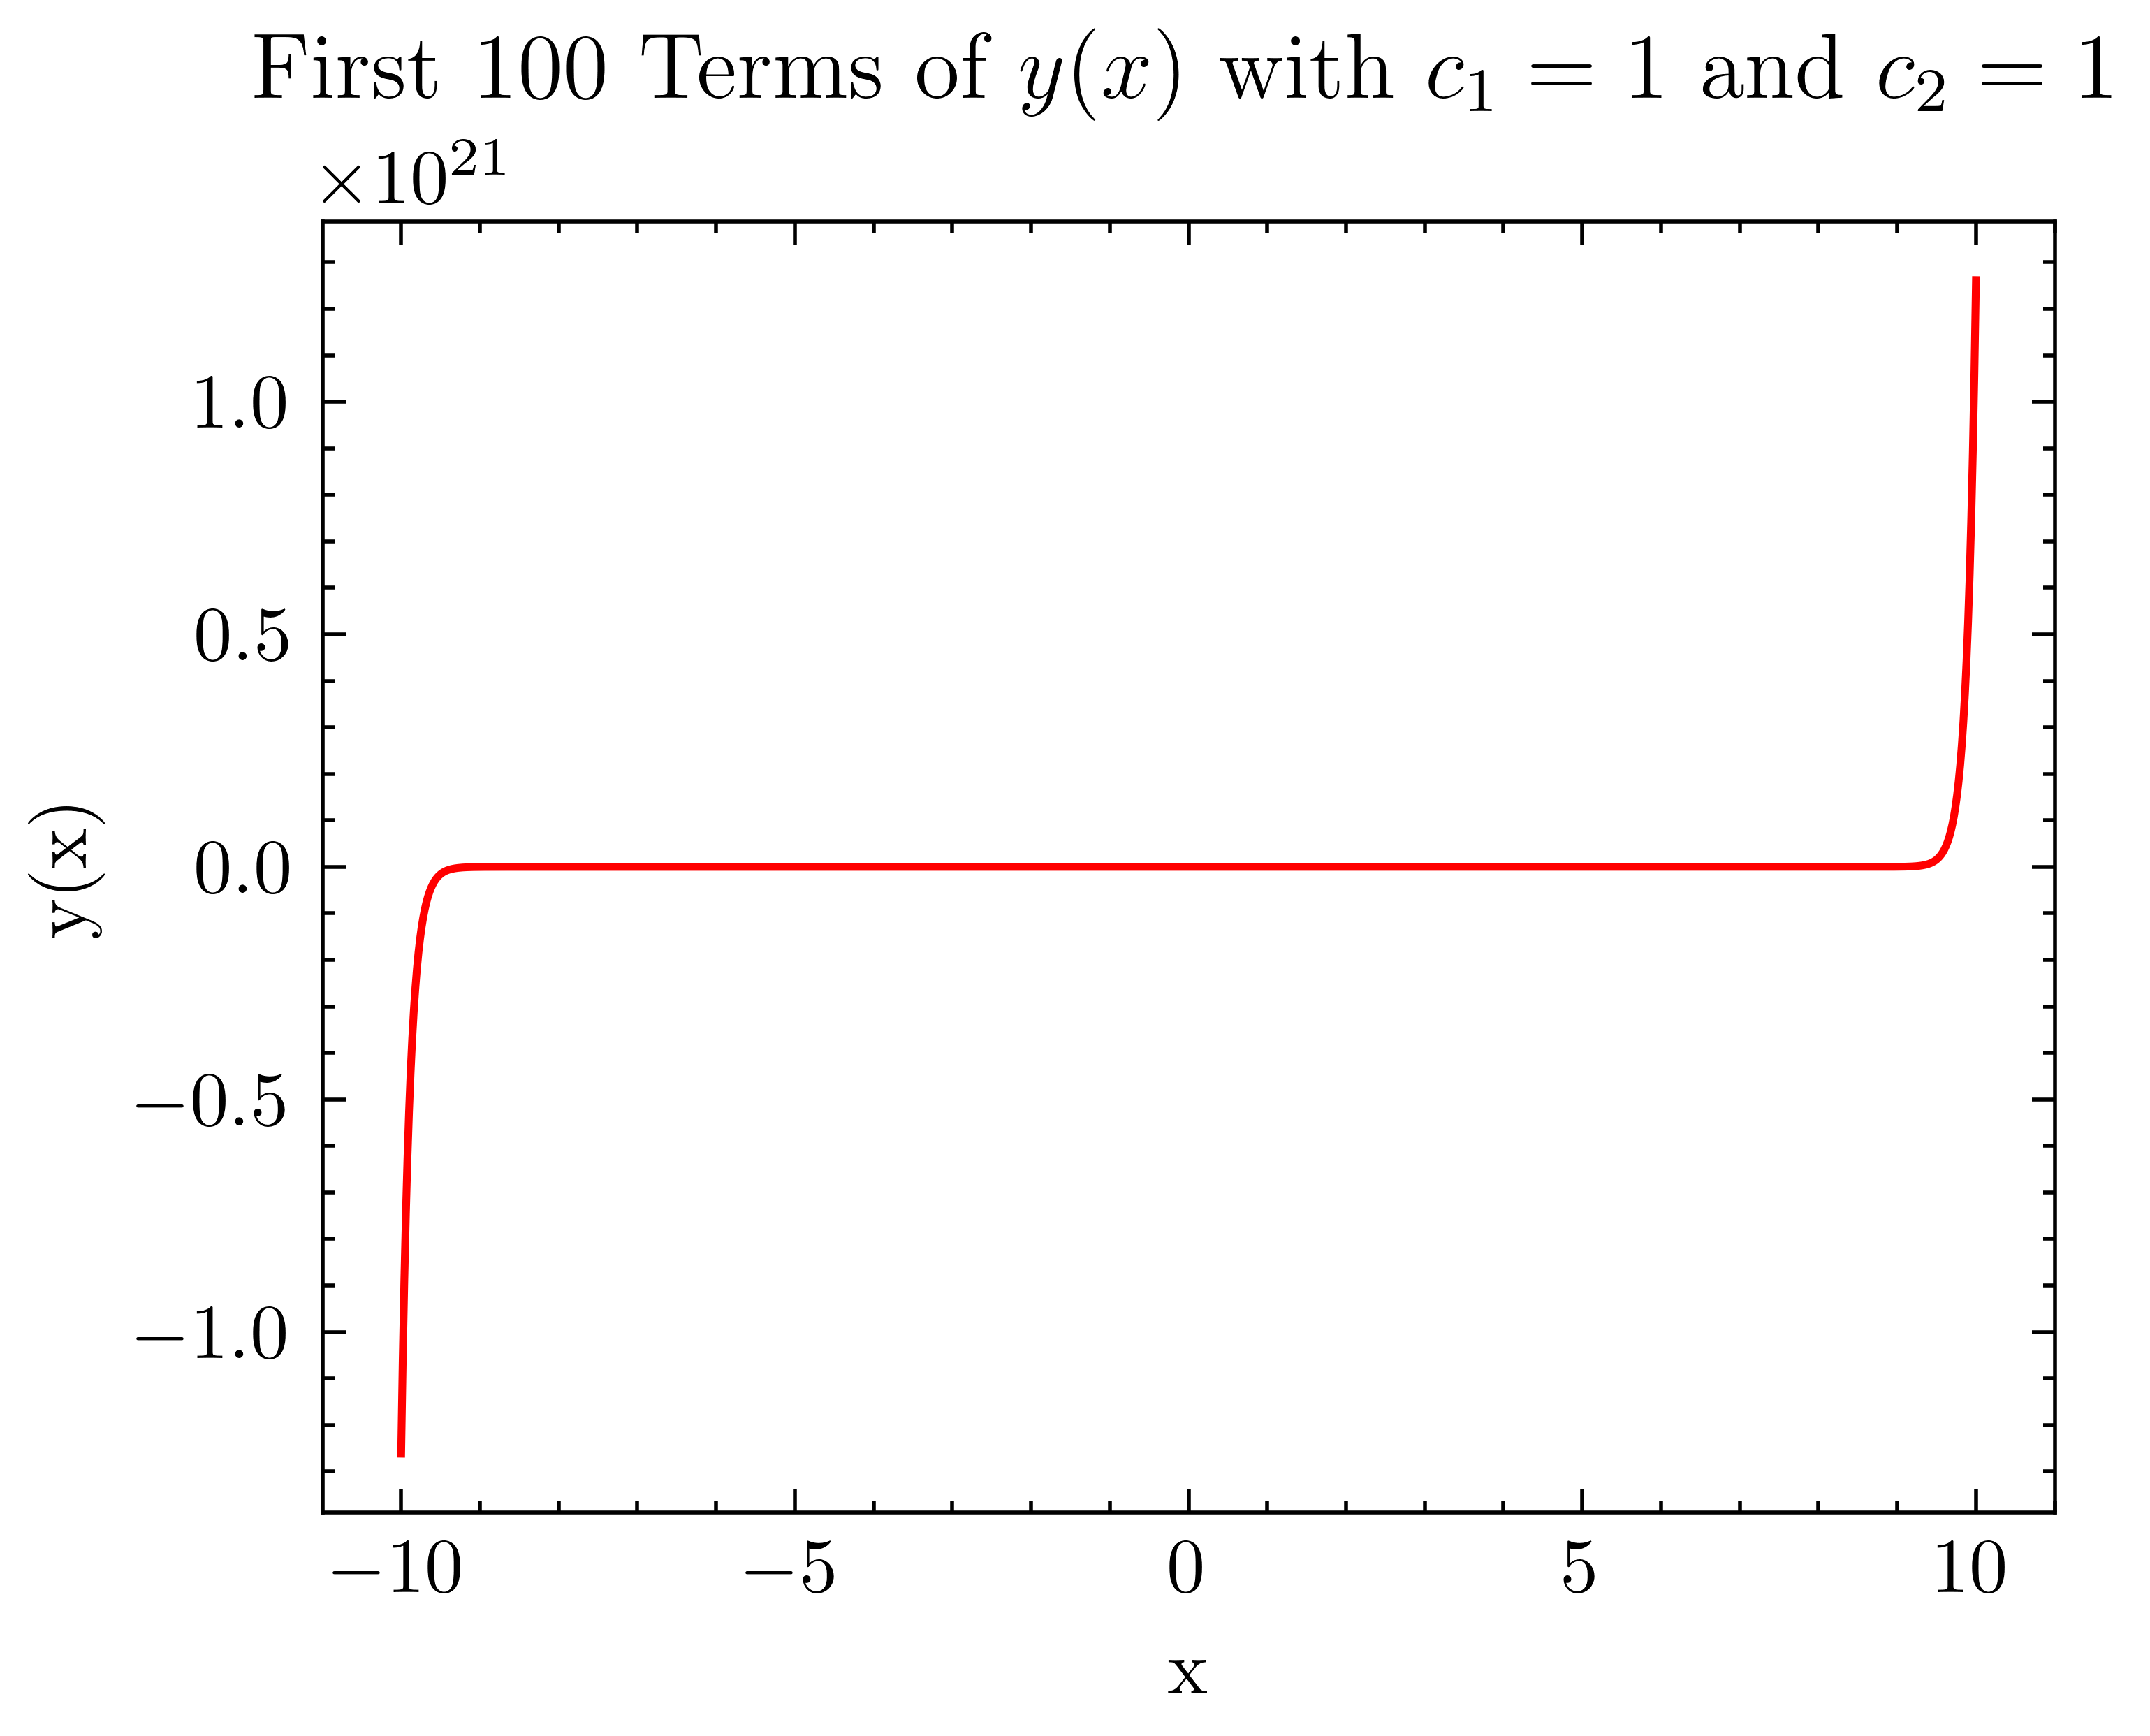

In [59]:
def taylor_series(x):
    return (
        1 + 5*x + (5*x**3)/6 + x**5/8 + (5*x**7)/336 + (5*x**9)/3456 + x**11/8448 + x**13/119808 + x**15/1935360 + x**17/35094528 + x**19/706019328 + x**21/15606743040 + x**23/376048189440 + x**25/9809952768000 + x**27/275463473725440 + x**29/8284308913520640 + x**31/265669216881868800 + x**33/9049893323459788800 + x**35/326344638027792384000 + x**37/12419744510086270156800 + x**39/497461117944536550604800 + x**41/20918877780231793410048000 + x**43/921451055392649241427968000 + x**45/42429606736684779023892480000 + x**47/2038506883660277605547900928000 + x**49/102012089156786658047843893248000 + x**51/5308792394893999551469427097600000 + x**53/286882977261330642428426295705600000 + x**55/16076272499361358641743888646144000000 + x**57/933008396690208305171754410154393600000 + x**59/56013240938138470531539361255233945600000 + x**61/3474719692094691561787018003290783744000000 + x**63/222495985529866643284263808538586906624000000 + x**65/14691798409591194223214880055881294151680000000 + x**67/999494347187880936231633840109339734441984000000 + x**69/69994439955306527653713820564074955731369984000000 + x**71/5041628501128600615057357800050036666447953920000000 + x**73/373222526787773589193541867564267503082400645120000000 + x**75/28375137310577307123618594040844995097360596992000000000 + x**77/2214017380553312017165546831026998817463389514629120000000 + x**79/177178897389214398049014280166082684587135145313566720000000 + x**81/14533155127621636700729272600964756912970072678884966400000000 + x**83/1221143874056701967718067028668717722835485366080136806400000000 + x**85/105047798322468096982012031140899331819823680889303334912000000000 + x**87/9246677965278897666110753141131868243246126828397265315430400000000 + x**89/832413584184647431275625501164882667598892704827671056901734400000000 + x**91/76600755668227668114015425331914483681291362388074448944103424000000000 + x**93/7202154565905010202016659111427036509638779083432582254568669184000000000 + x**95/691561723371309044129126514677886408936282765753257629390303395840000000000 + x**97/67787608084564524409793958996636613052785948575729842577710581284864000000000
    )

x = np.linspace(-10, 10, 1000)
y = taylor_series(x)

plt.figure(figsize=(4, 3))

plt.plot(x, y, color='red')

plt.xlabel('x')
plt.ylabel('y(x)')

plt.title(r'First 100 Terms of $y(x)$ with $c_1=1$ and $c_2=1$')

plt.grid(False)
plt.savefig('last-one.png', dpi=800, bbox_inches='tight')

plt.show()